# Вычисление ковалентных параметров для молекулярной механики

In [ ]:
#импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import subprocess
import time

Функция для расчёта энергии молекулы исходя из её z-матрицы(используем orca)

In [12]:
def run_orca(inp):
    with open('orca.inp', 'w') as outfile:
        outfile.write(inp)
    p = subprocess.Popen("/srv/databases/orca/orca orca.inp", 
                          shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    out=p.communicate()[0]
    lines = out.splitlines()
    for line in lines:
        line = str(line, 'utf-8')
        if line.find('FINAL SINGLE') > -1:
            energy = float(line.split()[4])
            return energy 

In [13]:
#z-матрица
inp = '''!HF RHF 6-31G
* int 0 1
C 0 0 0 0 0 0 
C 1 0 0 1.52986 0 0 
H 1 2 0 1.08439 111.200 0
H 1 2 3 1.08439 111.200 120
H 1 2 3 1.08439 111.200 -120
H 2 1 3 1.08439 111.200 180
H 2 1 5 1.08439 111.200 120
H 2 1 5 1.08439 111.200 -120
*
'''

Как зависит энергия от длины связи:

In [22]:
def energy(l, values, inpf):
    enss = []
    for i, val in enumerate(values):
        print(f'{l} {val}', end=' ')
        inp = inpf(val)
        #print(inp, end='\r')
        print('', end='\r')
        enss.append(run_orca(inp))
    print('\ndone', '\n', '-'*10)
    return enss

In [23]:
vals = np.arange(120, 180, 2) / 100
inp_form = lambda x : f'''!HF RHF 6-31G
* int 0 1
C 0 0 0 0 0 0 
C 1 0 0 {x:>6.5f} 0 0 
H 1 2 0 1.08439 111.200 0
H 1 2 3 1.08439 111.200 120
H 1 2 3 1.08439 111.200 -120
H 2 1 3 1.08439 111.200 180
H 2 1 5 1.08439 111.200 120
H 2 1 5 1.08439 111.200 -120
*
'''
ens = energy('bond', vals, inp_form)

bond 1.78 
done 
 ----------


Optimized by scipy: [  0.83705262   1.56708471 -79.08618662]


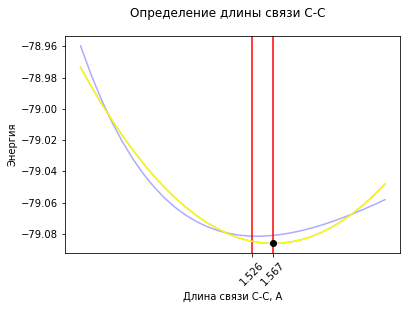

In [24]:
X = vals
Y = ens

fit = lambda p, x: p[0] * (p[1] - x) ** 2 + p[2]
err = lambda p, x, y: fit(p, x) - y
params1 = (1, 1, -79)
params_op, ok = optimize.leastsq(err, params1[:], args=(X, Y))
print(f'Optimized by scipy: {params_op}')

plt.plot(X, Y, 'r-', X, fit(params_op, X), 'r-', c='blue', alpha=0.33)
plt.axvline(x=1.526, c='red') # минимум по gaff (table 3.)

plt.plot(X, fit(params_op, X), 'r-', c='yellow')
plt.axvline(x=params_op[1], c='red')

plt.plot(params_op[1], params_op[2], 'ro', c='black') # вершина параболы 

plt.suptitle('Определение длины связи С-С')
plt.xticks((1.526, float(f'{params_op[1]:.3f}')), rotation=45)
plt.ylabel('Энергия')
plt.xlabel('Длина связи С-С, A')
plt.show()

In [17]:
# в пределах от
angles = np.arange(1092, 1134, 2) / 10

inp_form = lambda x :f'''!HF RHF 6-31G
* int 0 1
C 0 0 0 0 0 0 
C 1 0 0 1.52986 0 0 
H 1 2 0 1.08439 {x:>6.3f} 0
H 1 2 3 1.08439 111.200 120
H 1 2 3 1.08439 111.200 -120
H 2 1 3 1.08439 111.200 180
H 2 1 5 1.08439 111.200 120
H 2 1 5 1.08439 111.200 -120
*
'''
ens = get_energies('angle', angles, inp_form)

angle 113.2 
done 
 ----------


Optimized by scipy: [ 4.10669209e-05  1.10890554e+02 -7.90815352e+01]
minimum energy at 110.8


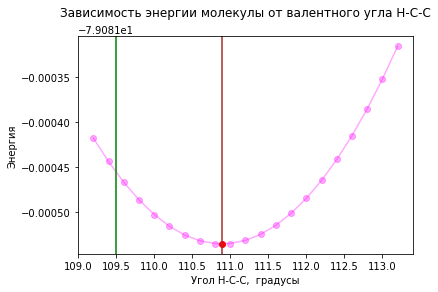

In [18]:
X = angles
Y = ens

fit = lambda p, x: p[0] * (p[1] - x) ** 2 + p[2] # чем апроксимируем. парабола.
err = lambda p, x, y: fit(p, x) - y # функция ош.
params1 = (1, 1, -79)
params_op, ok = optimize.leastsq(err, params1[:], args=(X, Y))
print(f'Optimized by scipy: {params_op}')
print("minimum energy at {}".format(X[np.argmin(Y)]))
plt.plot(X, Y, 'ro', X, fit(params_op, X), 'r-', c='magenta', alpha=0.33)
plt.plot(params_op[1], params_op[2], 'ro', c="red")
plt.axvline(x=params_op[1], c='brown')
plt.axvline(x=109.5, c = "green")
plt.ylabel('Энергия')
plt.xlabel('Угол H-C-C,  градусы')
plt.title('Зависимость энергии молекулы от валентного угла H-C-C', pad = 20)
plt.show()

In [19]:
# в пределах от -180 до 180
tors = np.arange(-180, 181, 12)

inp_form = lambda x :f'''!HF RHF 6-31G
* int 0 1
C 0 0 0 0 0 0 
C 1 0 0 1.52986 0 0 
H 1 2 0 1.08439 111.2000 0
H 1 2 3 1.08439 111.200 120
H 1 2 3 1.08439 111.200 -120
H 2 1 3 1.08439 111.200 {x:>3.1f}
H 2 1 6 1.08439 111.200 120
H 2 1 6 1.08439 111.200 -120
*
'''
ens = get_energies('angle', tors, inp_form)

angle 180  
done 
 ----------


Optimized by scipy: [ 9.94834578e-01  1.57079668e+00  2.29205095e-03 -7.91952842e+01]


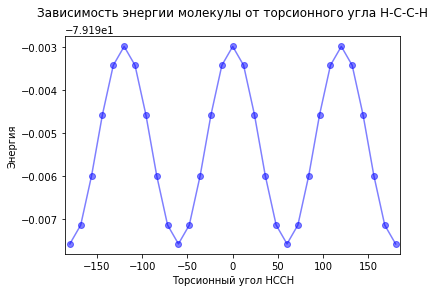

In [20]:
X = tors
Y = ens

fit = lambda p, x: np.sin(x * p[0] + p[1]) * p[2] + p[3]
err = lambda p, x, y: fit(p, x) - y

params1 = (1, 1, -79, 0)
params_op, ok = optimize.leastsq(err, params1[:], args=(X, Y))

print(f'Optimized by scipy: {params_op}')


plt.plot(X, Y, "ro", X, fit(params_op , X),"r-", c="blue", alpha=0.5)
plt.xlim(-185,185)
plt.ylabel('Энергия')
plt.xlabel('Торсионный угол HCCH')
plt.title('Зависимость энергии молекулы от торсионного угла H-C-C-H', pad=20)
plt.show()